Objectius:  
- Utilitzar pipelines i grid search
- Realitzar mineria de texts

### Nivell 1
#### - Exercici 1
Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

In [269]:
# basic libraries
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

#model creation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# metrics
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings("ignore")

Agafarem el clàssic dataset de classificació 'iris' per fer la nostra primera pipeline:

Variables:  
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:   
      -- Iris Setosa  
      -- Iris Versicolour  
      -- Iris Virginica

In [2]:
cols = ['sepal length', 'sepal width' ,'petal length', 'petal width', 'tipo']

In [3]:
df = pd.read_csv('iris.data', names = cols)

In [4]:
df

,sepal length,sepal width,petal length,petal width,tipo
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df['tipo'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: tipo, dtype: int64

In [6]:
forecast_col = 'tipo'

In [7]:
df['tipo']

0          Iris-setosa
1          Iris-setosa
2          Iris-setosa
3          Iris-setosa
4          Iris-setosa
5          Iris-setosa
6          Iris-setosa
7          Iris-setosa
8          Iris-setosa
9          Iris-setosa
10         Iris-setosa
11         Iris-setosa
12         Iris-setosa
13         Iris-setosa
14         Iris-setosa
15         Iris-setosa
16         Iris-setosa
17         Iris-setosa
18         Iris-setosa
19         Iris-setosa
20         Iris-setosa
21         Iris-setosa
22         Iris-setosa
23         Iris-setosa
24         Iris-setosa
25         Iris-setosa
26         Iris-setosa
27         Iris-setosa
28         Iris-setosa
29         Iris-setosa
30         Iris-setosa
31         Iris-setosa
32         Iris-setosa
33         Iris-setosa
34         Iris-setosa
35         Iris-setosa
36         Iris-setosa
37         Iris-setosa
38         Iris-setosa
39         Iris-setosa
40         Iris-setosa
41         Iris-setosa
42         Iris-setosa
43         

In [8]:
encoder = LabelEncoder()

df['tipo']= encoder.fit_transform(df['tipo'])

df.head()

,sepal length,sepal width,petal length,petal width,tipo
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['tipo'].value_counts()

0    50
1    50
2    50
Name: tipo, dtype: int64

In [10]:
# Features i target

X = df.drop([forecast_col],1)
y = df[forecast_col]

Fem la pipeline, amb els 'steps': 1. estanderitzar i 2. RandomForest:

In [11]:
steps = [('scaler', StandardScaler()), ('rf', RandomForestClassifier())]
pipeline = Pipeline(steps)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=30, stratify=y)

Definim els diferents paràmetres que volem tocar i els diferents valors que volem provar en cadascún:

In [13]:
parameters = {'rf__n_estimators':[100, 500, 700], 'rf__max_features':['auto', 
'sqrt', 'log2'], 'rf__class_weight':['balanced',None]}

Definim el GridSearchCV per aglutinar la pipeline i el parameter tunning:

In [14]:
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [15]:
grid.fit(X_train, y_train)
print ("score = %3.2f" %(grid.score(X_test,y_test)))
print (grid.best_params_)

score = 0.90
{'rf__class_weight': 'balanced', 'rf__max_features': 'auto', 'rf__n_estimators': 100}


In [16]:
rf_pred = grid.predict(X_test)

In [17]:
df_rf=pd.DataFrame({'Actual':y_test, 'Predicted':rf_pred})
df_rf

,Actual,Predicted
107,2,2
113,2,2
37,0,0
64,1,1
79,1,1
2,0,0
47,0,0
12,0,0
130,2,2
91,1,1


Mirem la null accuracy per comparar-la amb l'obtinguda:

In [18]:
y_test.value_counts().head(1) / len(y_test)

0    0.333333
Name: tipo, dtype: float64

In [19]:
accuracy = metrics.accuracy_score(y_test, rf_pred)

In [20]:
accuracy

0.9

In [21]:
print(classification_report(y_test, rf_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



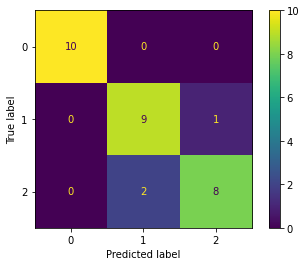

In [22]:
plot_confusion_matrix(grid, X_test, y_test)  
plt.show()  

Treiem els únics registres que l'algoritme no ha classificat correctament:

In [23]:
df_rf[df_rf['Actual']!=df_rf['Predicted']]

,Actual,Predicted
77,1,2
119,2,1
134,2,1


In [24]:
df.iloc[[77, 119, 134]]

,sepal length,sepal width,petal length,petal width,tipo
77,6.7,3.0,5.0,1.7,1
119,6.0,2.2,5.0,1.5,2
134,6.1,2.6,5.6,1.4,2


#### - Exercici 2
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

In [25]:
# Text extret de: https://plato.stanford.edu/entries/aristotle/#HapPolAss
text = """Aristotle’s basic teleological framework extends to his ethical and political theories, 
        which he regards as complementing one another. He takes it as given that most people wish to lead
        good lives; the question then becomes what the best life for human beings consists in. Because he
        believes that the best life for a human being is not a matter of subjective preference, he also 
        believes that people can (and, sadly, often do) choose to lead sub-optimal lives. In order to avoid
        such unhappy eventualities, Aristotle recommends reflection on the criteria any successful candidate
        for the best life must satisfy. He proceeds to propose one kind of life as meeting those criteria 
        uniquely and therefore promotes it as the superior form of human life. This is a life lived in
        accordance with reason."""

In [26]:
from nltk.tokenize import word_tokenize
import nltk
tokenized_sent=word_tokenize(text)
print(tokenized_sent)

['Aristotle', '’', 's', 'basic', 'teleological', 'framework', 'extends', 'to', 'his', 'ethical', 'and', 'political', 'theories', ',', 'which', 'he', 'regards', 'as', 'complementing', 'one', 'another', '.', 'He', 'takes', 'it', 'as', 'given', 'that', 'most', 'people', 'wish', 'to', 'lead', 'good', 'lives', ';', 'the', 'question', 'then', 'becomes', 'what', 'the', 'best', 'life', 'for', 'human', 'beings', 'consists', 'in', '.', 'Because', 'he', 'believes', 'that', 'the', 'best', 'life', 'for', 'a', 'human', 'being', 'is', 'not', 'a', 'matter', 'of', 'subjective', 'preference', ',', 'he', 'also', 'believes', 'that', 'people', 'can', '(', 'and', ',', 'sadly', ',', 'often', 'do', ')', 'choose', 'to', 'lead', 'sub-optimal', 'lives', '.', 'In', 'order', 'to', 'avoid', 'such', 'unhappy', 'eventualities', ',', 'Aristotle', 'recommends', 'reflection', 'on', 'the', 'criteria', 'any', 'successful', 'candidate', 'for', 'the', 'best', 'life', 'must', 'satisfy', '.', 'He', 'proceeds', 'to', 'propose'

In [27]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_sent)
print(fdist)

<FreqDist with 95 samples and 148 outcomes>


In [28]:
fdist.most_common(2)

[('.', 6), ('the', 6)]

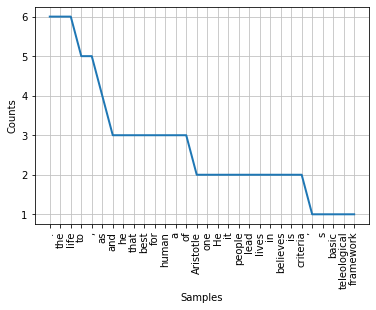

In [29]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

### Nivell 2
#### - Exercici 1
Treu les stopwords i realitza stemming al teu conjunt de dades.

Treiem les stop words agafant el conjunt de paraules en anglès per defecte. A continuació filtrem el nostre text amb aquestes i visualitzem la freqüència de paraules un cop hem tret les stop words:

In [30]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [31]:
filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
print("Filterd Sentence:",filtered_sent)

Filterd Sentence: ['Aristotle', '’', 'basic', 'teleological', 'framework', 'extends', 'ethical', 'political', 'theories', ',', 'regards', 'complementing', 'one', 'another', '.', 'He', 'takes', 'given', 'people', 'wish', 'lead', 'good', 'lives', ';', 'question', 'becomes', 'best', 'life', 'human', 'beings', 'consists', '.', 'Because', 'believes', 'best', 'life', 'human', 'matter', 'subjective', 'preference', ',', 'also', 'believes', 'people', '(', ',', 'sadly', ',', 'often', ')', 'choose', 'lead', 'sub-optimal', 'lives', '.', 'In', 'order', 'avoid', 'unhappy', 'eventualities', ',', 'Aristotle', 'recommends', 'reflection', 'criteria', 'successful', 'candidate', 'best', 'life', 'must', 'satisfy', '.', 'He', 'proceeds', 'propose', 'one', 'kind', 'life', 'meeting', 'criteria', 'uniquely', 'therefore', 'promotes', 'superior', 'form', 'human', 'life', '.', 'This', 'life', 'lived', 'accordance', 'reason', '.']


In [32]:
fdist = FreqDist(filtered_sent)
print(fdist)

<FreqDist with 68 samples and 94 outcomes>


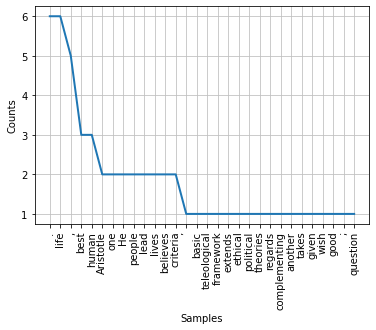

In [33]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

Fem stemming

In [34]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Aristotle', '’', 'basic', 'teleological', 'framework', 'extends', 'ethical', 'political', 'theories', ',', 'regards', 'complementing', 'one', 'another', '.', 'He', 'takes', 'given', 'people', 'wish', 'lead', 'good', 'lives', ';', 'question', 'becomes', 'best', 'life', 'human', 'beings', 'consists', '.', 'Because', 'believes', 'best', 'life', 'human', 'matter', 'subjective', 'preference', ',', 'also', 'believes', 'people', '(', ',', 'sadly', ',', 'often', ')', 'choose', 'lead', 'sub-optimal', 'lives', '.', 'In', 'order', 'avoid', 'unhappy', 'eventualities', ',', 'Aristotle', 'recommends', 'reflection', 'criteria', 'successful', 'candidate', 'best', 'life', 'must', 'satisfy', '.', 'He', 'proceeds', 'propose', 'one', 'kind', 'life', 'meeting', 'criteria', 'uniquely', 'therefore', 'promotes', 'superior', 'form', 'human', 'life', '.', 'This', 'life', 'lived', 'accordance', 'reason', '.']
Stemmed Sentence: ['aristotl', '’', 'basic', 'teleolog', 'framework', 'extend', 'et

POS-Tagging

In [35]:

sent = """Aristotle’s basic teleological framework extends to his ethical and political theories, 
        which he regards as complementing one another."""


tokens=word_tokenize(sent)
print(tokens)

['Aristotle', '’', 's', 'basic', 'teleological', 'framework', 'extends', 'to', 'his', 'ethical', 'and', 'political', 'theories', ',', 'which', 'he', 'regards', 'as', 'complementing', 'one', 'another', '.']


In [36]:
nltk.pos_tag(tokens)

[('Aristotle', 'NNP'),
 ('’', 'NNP'),
 ('s', 'VBD'),
 ('basic', 'JJ'),
 ('teleological', 'JJ'),
 ('framework', 'NN'),
 ('extends', 'VBZ'),
 ('to', 'TO'),
 ('his', 'PRP$'),
 ('ethical', 'JJ'),
 ('and', 'CC'),
 ('political', 'JJ'),
 ('theories', 'NNS'),
 (',', ','),
 ('which', 'WDT'),
 ('he', 'PRP'),
 ('regards', 'VBZ'),
 ('as', 'IN'),
 ('complementing', 'VBG'),
 ('one', 'CD'),
 ('another', 'DT'),
 ('.', '.')]

### Nivell 3
#### - Exercici 1
Realitza sentiment analysis al teu conjunt de dades.

## Sentyment Analysis d'un text

Fem un sentiment analysis del text anterior fent servir VADER (Valence Aware Dictionary and sEntiment Reasoner). És un sentiment analyzer pre-entrenat d'NLTK.

In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [38]:
 sia.polarity_scores("""Aristotle’s basic teleological framework extends to his ethical and political theories, 
        which he regards as complementing one another. He takes it as given that most people wish to lead
        good lives; the question then becomes what the best life for human beings consists in. Because he
        believes that the best life for a human being is not a matter of subjective preference, he also 
        believes that people can (and, sadly, often do) choose to lead sub-optimal lives. In order to avoid
        such unhappy eventualities, Aristotle recommends reflection on the criteria any successful candidate
        for the best life must satisfy. He proceeds to propose one kind of life as meeting those criteria 
        uniquely and therefore promotes it as the superior form of human life. This is a life lived in
        accordance with reason.""")

{'neg': 0.056, 'neu': 0.707, 'pos': 0.237, 'compound': 0.9834}

Podem veure que el nostre text ha estat analitzant com a 5.6% negatiu, 70.7% neutre i 23.7% positiu. Ara fem servir TextBlob:

In [39]:
from textblob import TextBlob
blob = TextBlob("""Aristotle’s basic teleological framework extends to his ethical and political theories, 
        which he regards as complementing one another. He takes it as given that most people wish to lead
        good lives; the question then becomes what the best life for human beings consists in. Because he
        believes that the best life for a human being is not a matter of subjective preference, he also 
        believes that people can (and, sadly, often do) choose to lead sub-optimal lives. In order to avoid
        such unhappy eventualities, Aristotle recommends reflection on the criteria any successful candidate
        for the best life must satisfy. He proceeds to propose one kind of life as meeting those criteria 
        uniquely and therefore promotes it as the superior form of human life. This is a life lived in
        accordance with reason.""")

Primer fem tokenization del text:

In [40]:
text_words = blob.words

In [52]:
for np in blob.noun_phrases:
    print (np)

aristotle
’ s
basic teleological framework
political theories
good lives
human beings
subjective preference
such unhappy eventualities
aristotle
successful candidate
superior form
human life


In [53]:
for words, tag in blob.tags:
    print (words, tag)

Aristotle NNP
’ NNP
s VBD
basic JJ
teleological JJ
framework NN
extends VBZ
to TO
his PRP$
ethical JJ
and CC
political JJ
theories NNS
which WDT
he PRP
regards VBZ
as IN
complementing VBG
one CD
another DT
He PRP
takes VBZ
it PRP
as IN
given VBN
that IN
most JJS
people NNS
wish VBP
to TO
lead VB
good JJ
lives NNS
the DT
question NN
then RB
becomes VBZ
what WP
the DT
best JJS
life NN
for IN
human JJ
beings NNS
consists VBZ
in IN
Because IN
he PRP
believes VBZ
that IN
the DT
best JJS
life NN
for IN
a DT
human JJ
being VBG
is VBZ
not RB
a DT
matter NN
of IN
subjective JJ
preference NN
he PRP
also RB
believes VBZ
that IN
people NNS
can MD
and CC
sadly RB
often RB
do VBP
choose VB
to TO
lead VB
sub-optimal JJ
lives NNS
In IN
order NN
to TO
avoid VB
such JJ
unhappy JJ
eventualities NNS
Aristotle NNP
recommends VBZ
reflection NN
on IN
the DT
criteria NNS
any DT
successful JJ
candidate NN
for IN
the DT
best JJS
life NN
must MD
satisfy VB
He PRP
proceeds VBZ
to TO
propose VB
one CD
kind NN
of I

Fem sentiment analysis amb polarity i subjectivity:

In [55]:
print(blob)
blob.sentiment

Aristotle’s basic teleological framework extends to his ethical and political theories, 
        which he regards as complementing one another. He takes it as given that most people wish to lead
        good lives; the question then becomes what the best life for human beings consists in. Because he
        believes that the best life for a human being is not a matter of subjective preference, he also 
        believes that people can (and, sadly, often do) choose to lead sub-optimal lives. In order to avoid
        such unhappy eventualities, Aristotle recommends reflection on the criteria any successful candidate
        for the best life must satisfy. He proceeds to propose one kind of life as meeting those criteria 
        uniquely and therefore promotes it as the superior form of human life. This is a life lived in
        accordance with reason.


Sentiment(polarity=0.31805555555555554, subjectivity=0.5152777777777778)

## Sentyment Analysys del dataset Apple Tweets

Agafem aquest dataset de tweets que hem trobat sobre Apple del 2014:

In [65]:
df = pd.read_csv('Apple-Twitter-Sentiment-DFE.csv')

In [66]:
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...
3881,623499442,True,golden,13,NaN,3,0.7757,Tue Dec 09 22:08:53 +0000 2014,5.420000e+17,#AAPL OR @Apple,5\n3,(Via FC) Apple Is Warming Up To Social Media -...
3882,623499450,True,golden,16,NaN,3,0.6225,Tue Dec 09 22:18:27 +0000 2014,5.420000e+17,#AAPL OR @Apple,3\n1,RT @MMLXIV: there is no avocado emoji may I as...
3883,623499486,True,golden,14,NaN,5,0.9347,Tue Dec 09 23:45:59 +0000 2014,5.420000e+17,#AAPL OR @Apple,5,@marcbulandr I could not agree more. Between @...
3884,623499514,True,golden,13,NaN,1,0.9230,Wed Dec 10 00:48:10 +0000 2014,5.420000e+17,#AAPL OR @Apple,1,My iPhone 5's photos are no longer downloading...


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   _last_judgment_at     3783 non-null   object 
 5   sentiment             3886 non-null   object 
 6   sentiment:confidence  3886 non-null   float64
 7   date                  3886 non-null   object 
 8   id                    3886 non-null   float64
 9   query                 3886 non-null   object 
 10  sentiment_gold        103 non-null    object 
 11  text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 337.9+ KB


### Tokenization, lemmatization, noise removal and Words Cloud

Agafem la columna text, on estan els tweets per crear el nostre propi sentiment analysis, i la convertim a llista d'strings:

In [74]:
tweets_list = df['text'].tolist()

Provem de tokenitzar el primer tweet:

In [79]:
word_tokenize(tweets_list[0])

['#',
 'AAPL',
 ':',
 'The',
 '10',
 'best',
 'Steve',
 'Jobs',
 'emails',
 'ever',
 '...',
 'http',
 ':',
 '//t.co/82G1kL94tx']

Ens separa l'url en 3 parts i això complica els pròxims passos. Provem un altre tokenitzador:

In [126]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()
tweet_tokenizer.tokenize(tweets_list[0])

['#AAPL',
 ':',
 'The',
 '10',
 'best',
 'Steve',
 'Jobs',
 'emails',
 'ever',
 '...',
 'http://t.co/82G1kL94tx']

Tokenitzem tots els tweets:

In [127]:
token_list = []
for i in tweets_list:
    x = tweet_tokenizer.tokenize(i)
    token_list.append(x)


In [128]:
token_list

[['#AAPL',
  ':',
  'The',
  '10',
  'best',
  'Steve',
  'Jobs',
  'emails',
  'ever',
  '...',
  'http://t.co/82G1kL94tx'],
 ['RT',
  '@JPDesloges',
  ':',
  'Why',
  'AAPL',
  'Stock',
  'Had',
  'a',
  'Mini-Flash',
  'Crash',
  'Today',
  '$',
  'AAPL',
  '#aapl',
  'http://t.co/hGFcjYa0E9'],
 ['My',
  'cat',
  'only',
  'chews',
  '@apple',
  'cords',
  '.',
  'Such',
  'an',
  '#AppleSnob',
  '.'],
 ['I',
  'agree',
  'with',
  '@jimcramer',
  'that',
  'the',
  '#IndividualInvestor',
  'should',
  'own',
  'not',
  'trade',
  '#Apple',
  '#AAPL',
  ',',
  "it's",
  'extended',
  'so',
  "today's",
  'pullback',
  'is',
  'good',
  'to',
  'see'],
 ['Nobody', 'expects', 'the', 'Spanish', 'Inquisition', '#AAPL'],
 ['#AAPL',
  ':',
  '5',
  'Rocket',
  'Stocks',
  'to',
  'Buy',
  'for',
  'December',
  'Gains',
  ':',
  'Apple',
  'and',
  'More',
  '...',
  'http://t.co/eG5XhXdLLS'],
 ['Top',
  '3',
  'all',
  '@Apple',
  '#tablets',
  '.',
  'Damn',
  'right',
  '!',
  'http://

Fem pos-tag i lemmatization:

In [129]:
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

In [130]:
lemmatize_list = []
for i in token_list:
    x = lemmatize_sentence(i)
    lemmatize_list.append(x)

In [131]:
lemmatize_list

[['#AAPL',
  ':',
  'The',
  '10',
  'best',
  'Steve',
  'Jobs',
  'email',
  'ever',
  '...',
  'http://t.co/82G1kL94tx'],
 ['RT',
  '@JPDesloges',
  ':',
  'Why',
  'AAPL',
  'Stock',
  'Had',
  'a',
  'Mini-Flash',
  'Crash',
  'Today',
  '$',
  'AAPL',
  '#aapl',
  'http://t.co/hGFcjYa0E9'],
 ['My',
  'cat',
  'only',
  'chew',
  '@apple',
  'cord',
  '.',
  'Such',
  'an',
  '#AppleSnob',
  '.'],
 ['I',
  'agree',
  'with',
  '@jimcramer',
  'that',
  'the',
  '#IndividualInvestor',
  'should',
  'own',
  'not',
  'trade',
  '#Apple',
  '#AAPL',
  ',',
  "it's",
  'extend',
  'so',
  "today's",
  'pullback',
  'be',
  'good',
  'to',
  'see'],
 ['Nobody', 'expect', 'the', 'Spanish', 'Inquisition', '#AAPL'],
 ['#AAPL',
  ':',
  '5',
  'Rocket',
  'Stocks',
  'to',
  'Buy',
  'for',
  'December',
  'Gains',
  ':',
  'Apple',
  'and',
  'More',
  '...',
  'http://t.co/eG5XhXdLLS'],
 ['Top',
  '3',
  'all',
  '@Apple',
  '#tablets',
  '.',
  'Damn',
  'right',
  '!',
  'http://t.co/R

Eliminem el soroll dels tweets. El soroll és qualsevol part del text que no afegeix cap informació. En el nostre cas eliminarem les urls de twitter, els usernames amb @ a les respostes, els signes de puntuació fent servir Python RegEx i les stop-words. També passem les paraules a minúscules:

In [135]:
def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\# Eliminem els url
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token) #Eliminem els noms d'usuaris de les respostes
        token = re.sub("\.+", '',token) # Eliminem els punts suspensius

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [136]:
clean_list = []
for i in token_list:
    x = remove_noise(i, stop_words)
    clean_list.append(x)

In [137]:
clean_list

[['#aapl', '10', 'best', 'steve', 'jobs', 'email', 'ever'],
 ['rt', 'aapl', 'stock', 'mini-flash', 'crash', 'today', 'aapl', '#aapl'],
 ['cat', 'chew', 'cord', '#applesnob'],
 ['agree',
  '#individualinvestor',
  'trade',
  '#apple',
  '#aapl',
  'extend',
  "today's",
  'pullback',
  'good',
  'see'],
 ['nobody', 'expect', 'spanish', 'inquisition', '#aapl'],
 ['#aapl', '5', 'rocket', 'stocks', 'buy', 'december', 'gains', 'apple'],
 ['top', '3', '#tablets', 'damn', 'right'],
 ['cnbctv', "#apple's", 'margin', 'good', 'expect', '#aapl'],
 ['apple', 'inc', 'flash', 'crash', 'need', 'know', '#aapl'],
 ['#aapl',
  'presentation',
  'shows',
  'makes',
  "world's",
  'biggest',
  'tech',
  'companies'],
 ['wtf', 'battery', '31', 'one', 'second', 'ago', '29', 'wtf'],
 ['apple',
  'watch',
  'tops',
  'search',
  'engine',
  'list',
  'best',
  'wearable',
  'tech',
  '#aapl',
  '#iwatch',
  '#applewatch'],
 ['best-designed', '#iphone', '#apps', 'world', 'according'],
 ['rt',
  'bought',
  'st

In [139]:
# Comparem el procés de transformació amb el primer tweet
tweets_list[0]

'#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx'

El següent pas és determinar la freqüència de paraules. Per això reunirem totes les paraules de tots els tweets en una sola llista:

In [147]:
all_words = []

for tokens in clean_list:
    for token in tokens:
        all_words.append(token)
            

Fem el 'FreqDist' de nltk i printem els 10 tokens més comuns:

In [150]:
freq_dist_pos = FreqDist(all_words)
print(freq_dist_pos.most_common(10))

[('#aapl', 1034), ('rt', 848), ('apple', 718), ('need', 427), ('one', 390), ('4', 375), ('computer', 355), ('battery', 352), ('aapl', 349), ('future', 328)]


Visualitzem les paraules més empleades en els tweets amb un WORD CLOUD, primer d'un sol tweet i a continuació de tots els tweets junts:

In [273]:
all_words

['#aapl',
 '10',
 'best',
 'steve',
 'jobs',
 'email',
 'ever',
 'rt',
 'aapl',
 'stock',
 'mini-flash',
 'crash',
 'today',
 'aapl',
 '#aapl',
 'cat',
 'chew',
 'cord',
 '#applesnob',
 'agree',
 '#individualinvestor',
 'trade',
 '#apple',
 '#aapl',
 'extend',
 "today's",
 'pullback',
 'good',
 'see',
 'nobody',
 'expect',
 'spanish',
 'inquisition',
 '#aapl',
 '#aapl',
 '5',
 'rocket',
 'stocks',
 'buy',
 'december',
 'gains',
 'apple',
 'top',
 '3',
 '#tablets',
 'damn',
 'right',
 'cnbctv',
 "#apple's",
 'margin',
 'good',
 'expect',
 '#aapl',
 'apple',
 'inc',
 'flash',
 'crash',
 'need',
 'know',
 '#aapl',
 '#aapl',
 'presentation',
 'shows',
 'makes',
 "world's",
 'biggest',
 'tech',
 'companies',
 'wtf',
 'battery',
 '31',
 'one',
 'second',
 'ago',
 '29',
 'wtf',
 'apple',
 'watch',
 'tops',
 'search',
 'engine',
 'list',
 'best',
 'wearable',
 'tech',
 '#aapl',
 '#iwatch',
 '#applewatch',
 'best-designed',
 '#iphone',
 '#apps',
 'world',
 'according',
 'rt',
 'bought',
 'store

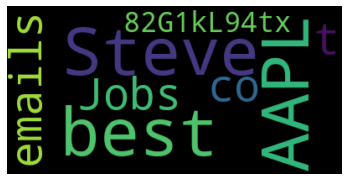

In [276]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = tweets_list[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [278]:
text = " ".join(all_words)
print ("There are {} words in the combination of all tweets.".format(len(text)))

There are 213913 words in the combination of all tweets.


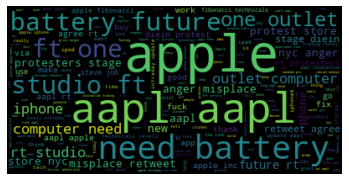

In [279]:
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Passem les paraules 'apple', 'aapl' i 'iphone' que són les que tenen més importància i les més obvies, com a stopwords per tal de veure quines altres paraules tenen més presència en els tweets:

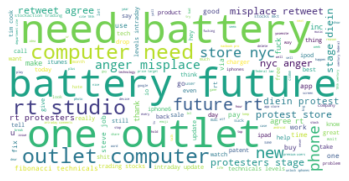

In [284]:
stopwords = set(STOPWORDS)
stopwords.update(["apple", "aapl", 'iphone', 'ft'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Sembla que les paraules més comunes, a banda d'apple i iphone, són 'battery future', 'need battery' i 'outlet'. Podem veure paraules associades amb queixes dels consumidors: 'nyc anger', 'protest store', 'anger misplace' i 'protesters'.

### Sentyment Analysis

Creem un DataFrame pel sentyment analisis dels tweets fent servir VADER:

In [158]:
df_vader = pd.DataFrame()

Recuperem els tweets sencers, en la seva forma inicial ja que els següents analitzadors de sentiments tenen en compte 

In [159]:
for i in tweets_list:
    sia = SentimentIntensityAnalyzer()
    x = sia.polarity_scores(i)
    df_vader = df_vader.append(x, ignore_index=True)

In [162]:
df_vader['tweet'] = df['text']

In [164]:
df_vader.columns

Index(['compound', 'neg', 'neu', 'pos', 'tweet'], dtype='object')

In [166]:
df_vader = df_vader[['tweet','compound', 'neg', 'neu', 'pos']]

In [167]:
df_vader

,tweet,compound,neg,neu,pos
0,#AAPL:The 10 best Steve Jobs emails ever...htt...,0.6369,0.000,0.588,0.412
1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,-0.4019,0.197,0.803,0.000
2,My cat only chews @apple cords. Such an #Apple...,0.0000,0.000,1.000,0.000
3,I agree with @jimcramer that the #IndividualIn...,0.6597,0.000,0.779,0.221
4,Nobody expects the Spanish Inquisition #AAPL,-0.2960,0.306,0.694,0.000
...,...,...,...,...,...
3881,(Via FC) Apple Is Warming Up To Social Media -...,0.1531,0.000,0.929,0.071
3882,RT @MMLXIV: there is no avocado emoji may I as...,-0.2960,0.180,0.820,0.000
3883,@marcbulandr I could not agree more. Between @...,0.4570,0.099,0.707,0.193
3884,My iPhone 5's photos are no longer downloading...,0.1280,0.092,0.795,0.113


- The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive). The more Compound score closer to +1, the higher the positivity of the text.

Creem un DataFrame pel sentyment analisis dels tweets fent servir TexTBloB:

In [168]:
from textblob import TextBlob

In [211]:
df_blob = pd.DataFrame()

In [212]:
for i in tweets_list:
    blob = TextBlob(i)
    data = {'polarity': round(blob.sentiment[0],3),
            'subjectivity': round(blob.sentiment[1],3),}
    
    df_blob = df_blob.append(data, ignore_index=True)

In [213]:
df_blob['tweet'] = df['text']

In [214]:
df_blob = df_blob[['tweet','polarity', 'subjectivity']]

In [215]:
df_blob

,tweet,polarity,subjectivity
0,#AAPL:The 10 best Steve Jobs emails ever...htt...,1.000,0.300
1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,0.000,0.000
2,My cat only chews @apple cords. Such an #Apple...,0.000,0.750
3,I agree with @jimcramer that the #IndividualIn...,0.650,0.800
4,Nobody expects the Spanish Inquisition #AAPL,0.000,0.000
...,...,...,...
3881,(Via FC) Apple Is Warming Up To Social Media -...,0.022,0.378
3882,RT @MMLXIV: there is no avocado emoji may I as...,0.000,0.000
3883,@marcbulandr I could not agree more. Between @...,0.433,0.750
3884,My iPhone 5's photos are no longer downloading...,0.000,0.000


- TextBlob’s output for a polarity task is a float within the range [-1.0, 1.0] where -1.0 is a negative polarity and 1.0 is positive. This score can also be equal to 0, which stands for a neutral evaluation of a statement as it doesn’t contain any words from the training set.  


- Whereas, a subjectivity/objectivity identification task reports a float within the range [0.0, 1.0] where 0.0 is a very objective sentence and 1.0 is very subjective.

Ara fem un DF comparant el polarity de TexTBloB i el compound del VADER amb cada tweet:

In [229]:
df_score = df_blob

In [230]:
df_score['compound'] = df_vader['compound']

In [233]:
df_score = df_score[['tweet', 'compound', 'polarity', 'subjectivity']]

In [234]:
df_score

,tweet,compound,polarity,subjectivity
0,#AAPL:The 10 best Steve Jobs emails ever...htt...,0.6369,1.000,0.300
1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,-0.4019,0.000,0.000
2,My cat only chews @apple cords. Such an #Apple...,0.0000,0.000,0.750
3,I agree with @jimcramer that the #IndividualIn...,0.6597,0.650,0.800
4,Nobody expects the Spanish Inquisition #AAPL,-0.2960,0.000,0.000
...,...,...,...,...
3881,(Via FC) Apple Is Warming Up To Social Media -...,0.1531,0.022,0.378
3882,RT @MMLXIV: there is no avocado emoji may I as...,-0.2960,0.000,0.000
3883,@marcbulandr I could not agree more. Between @...,0.4570,0.433,0.750
3884,My iPhone 5's photos are no longer downloading...,0.1280,0.000,0.000


In [240]:
round(df_score.describe(),4)

,compound,polarity,subjectivity
count,3886.0000,3886.0000,3886.0000
mean,0.0045,0.0419,0.2968
std,0.4102,0.3016,0.3181
min,-0.9787,-1.0000,0.0000
25%,-0.2263,0.0000,0.0000
50%,0.0000,0.0000,0.2000
75%,0.2732,0.1360,0.5268
max,0.9393,1.0000,1.0000


Conclusions: 
- Podem observar que, tenint en compte tant el compound de VADER com el polarity de TextBlob, la mitjana del sentiment analysis dels tweets és més aviat neutral (0.0045 i 0.042 respectivament).  

- La mitjana de subjectivitat és més aviat baixa, TextBlob interpreta que els tweets de mitjana són més objectius que subjectius (per sota el 0.5, ab un 0.3 aprox).

- La mètrica compound en cap cas arriba a l'1 o -1 absolut, mentre que polarity i subjectivity sí.

- Encara que els resultats no són idèntics entre polarity i compound, la mitjana ens indica que, en l'anàlisis global, els trets van cap a la mateixa direcció.

Estudiem els tweets de VADER segons són positius, neutrals o negatius:

In [262]:
vader_positius = df_score[df_score['compound'] > 0]

In [263]:
vader_neutrals = df_score[df_score['compound'] == 0]

In [264]:
vader_negatius = df_score[df_score['compound'] < 0]

In [265]:
vader_positius.describe()

,compound,polarity,subjectivity
count,1222.000000,1222.000000,1222.000000
mean,0.465359,0.226202,0.399850
std,0.220438,0.316379,0.329805
min,0.001800,-1.000000,0.000000
25%,0.318200,0.000000,0.000000
50%,0.440400,0.136000,0.409000
75%,0.624900,0.438000,0.665750
max,0.939300,1.000000,1.000000


Positius: tenim 1222 tweets positius. La seva mitjana és 0.465, amb una std de 0.22. La mitjana de subjectivitat dels tweets positius és igual a 0.4, amb un std de 0.33, donant lloc a que hi hagin opinions que creuin el marge de l'objectivitat (subjectivity > 0.5)

In [266]:
vader_neutrals.describe()

,compound,polarity,subjectivity
count,1576.0,1576.000000,1576.000000
mean,0.0,0.033173,0.165183
std,0.0,0.160460,0.250900
min,0.0,-1.000000,0.000000
25%,0.0,0.000000,0.000000
50%,0.0,0.000000,0.000000
75%,0.0,0.000000,0.200000
max,0.0,1.000000,1.000000


Neutrals: tenim 1576 observacions on el VADER ha qualificat el tweet com a neutral (compound = 0). És la classe més extensa. La mitjana de subjectivitat dels tweets neutrals és igual a 0.16 amb un std. de 0.25.

In [267]:
vader_negatius.describe()

,compound,polarity,subjectivity
count,1088.000000,1088.000000,1088.000000
mean,-0.506627,-0.152597,0.371562
std,0.215470,0.315082,0.324873
min,-0.978700,-1.000000,0.000000
25%,-0.688300,-0.441000,0.000000
50%,-0.542300,-0.073000,0.300000
75%,-0.340000,0.000000,0.605500
max,-0.025800,1.000000,1.000000


Negatius: tenim 1088 tweets negatius, la classe minoritària. La mitjana està a -0.51 amb una std de 0.21. La mitjana de subjectivitat dels negatius és 0.37 amb un std. de 0.32, donant lloc a que hi hagin opinions que creuin el marge de l'objectivitat (subjectivity > 0.5).

Per acabar visualitzem els Words Clouds per la divisió de positius/negatius/neutrals dels tweets fent servir VADER:

There are 68793 words in the combination of all tweets.


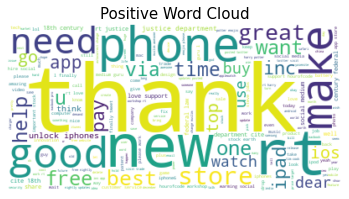

In [311]:
pos_index = vader_positius.index
tweets_list = df['text'].iloc[pos_index].tolist()

token_list = []
for i in tweets_list:
    x = tweet_tokenizer.tokenize(i)
    token_list.append(x)
    
clean_list = []
for i in token_list:
    x = remove_noise(i, stop_words)
    clean_list.append(x)
    
all_words = []
for tokens in clean_list:
    for token in tokens:
        all_words.append(token)
        
text = " ".join(all_words)
print ("There are {} words in the combination of all tweets.".format(len(text)))
            
stopwords = set(STOPWORDS)
stopwords.update(["apple", "aapl", 'iphone', 'ft'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.title('Positive Word Cloud', fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 59828 words in the combination of all tweets.


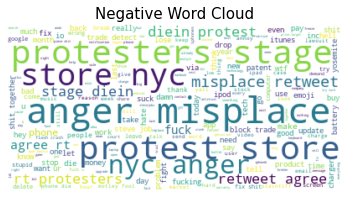

In [312]:
neg_index = vader_negatius.index
tweets_list = df['text'].iloc[neg_index].tolist()

token_list = []
for i in tweets_list:
    x = tweet_tokenizer.tokenize(i)
    token_list.append(x)
    
clean_list = []
for i in token_list:
    x = remove_noise(i, stop_words)
    clean_list.append(x)
    
all_words = []
for tokens in clean_list:
    for token in tokens:
        all_words.append(token)
        
text = " ".join(all_words)
print ("There are {} words in the combination of all tweets.".format(len(text)))
            
stopwords = set(STOPWORDS)
stopwords.update(["apple", "aapl", 'iphone', 'ft'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.title('Negative Word Cloud', fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 85290 words in the combination of all tweets.


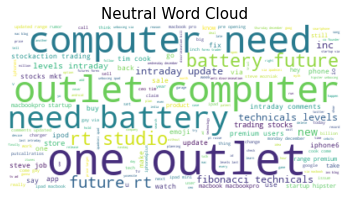

In [313]:
neu_index = vader_neutrals.index
tweets_list = df['text'].iloc[neu_index].tolist()

token_list = []
for i in tweets_list:
    x = tweet_tokenizer.tokenize(i)
    token_list.append(x)
    
clean_list = []
for i in token_list:
    x = remove_noise(i, stop_words)
    clean_list.append(x)
    
all_words = []
for tokens in clean_list:
    for token in tokens:
        all_words.append(token)
        
text = " ".join(all_words)
print ("There are {} words in the combination of all tweets.".format(len(text)))
            
stopwords = set(STOPWORDS)
stopwords.update(["apple", "aapl", 'iphone', 'ft'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.title('Neutral Word Cloud', fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Conclusions: gràcies als cloud words separats per la divisió positius/negatius/neutrals resultants del VADER, podem apreciar ràpidament quines paraules estretament relacionades amb Apple estan associades amb els tweets positius, negatius i neutrals. 

- En el cas dels positius a banda de les típiques paraules associades com a bones (good, new, future...) veiem: Ipad, ios, store, unlock iphone, app, time, pay i love support.
- En el cas dels negatius trobem: 'protesters stage', 'anger misplace', 'nyc anger' i 'store nyc'. Per aquesta disposició de paruales podríem intuir que hi va haver algun incident a la botiga Apple de Nova York. Hauríem d'aprofundir en el tema.
- En el cas dels neutrals, que són els tweets majoritaris i els que es repetien en el word cloud global trobem: 'computer need', 'battery future', 'outlet computer', 'need battery' i 'one outlet'. Des del meu punt de vista, en el word cloud neutral sembla que ens trobem amb necessitats expressades pels consumidors, fet que no és necessàriament negatiu (tot i que obliga a l'empresa a replantejar-se certes demandes) ni positiu.